In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t
import matplotlib.pyplot as plt

# Load the data
data_path = 'dat_CPS08.csv'
data = pd.read_csv(data_path)

# Data overview
data.head(), data.describe()

(         ahe  year  bachelor  female  age
 0  38.461540  2008         1       0   33
 1  12.500000  2008         1       0   31
 2   9.857142  2008         0       0   30
 3   8.241758  2008         0       0   30
 4  17.788462  2008         0       0   31,
                ahe    year     bachelor       female          age
 count  7711.000000  7711.0  7711.000000  7711.000000  7711.000000
 mean     18.976092  2008.0     0.481001     0.432629    29.577227
 std      10.139439     0.0     0.499671     0.495472     2.855258
 min       2.003205  2008.0     0.000000     0.000000    25.000000
 25%      12.019231  2008.0     0.000000     0.000000    27.000000
 50%      16.826923  2008.0     0.000000     0.000000    30.000000
 75%      23.557692  2008.0     1.000000     1.000000    32.000000
 max      82.417580  2008.0     1.000000     1.000000    34.000000)

### Data Overview
The dataset contains 7,711 observations from the 2008 Current Population Survey, with variables on earnings, gender, age, and educational attainment. Here are the main variables:

- `ahe`: Average Hourly Earnings
- `year`: Constant 2008 across all observations
- `bachelor`: 1 if the worker has a bachelor’s degree, 0 if only a high school diploma
- `female`: 1 if female, 0 if male
- `age`: Age of the worker

The average hourly earnings are around $18.98, with a standard deviation of $10.14. The age ranges from 25 to 34 years.

### Problem 1 - Regression Analysis
Let's start with the first task:
- **(a)** Run a regression of the logarithm of earnings (`log(ahe)`) on age, age squared (`age2`), female, and bachelor. Calculate the predicted log-earnings of a 30-year-old female with a bachelor's degree.

For this analysis, I will:
1. Add an `age2` variable (age squared) to the dataset for the non-linear relationship with earnings.
2. Fit a regression model.
3. Predict the log-earnings for a 30-year-old female with a bachelor's degree.

### Regression Results Summary

The regression model explains about 20.1% of the variability in log earnings (`R-squared: 0.201`). Here's a summary of the coefficients:
- **Intercept**: $ \beta_0 = 1.0854 $ (p = 0.089)
- **Age**: $ \beta_1 = 0.0814 $ (p = 0.061)
- **Age Squared**: $ \beta_2 = -0.0009 $ (p = 0.214)
- **Female**: $ \beta_3 = -0.1859 $ (p < 0.001)
- **Bachelor**: $ \beta_4 = 0.4284 $ (p < 0.001)

Now, let's calculate the predicted log-earnings for a 30-year-old female with a bachelor's degree using the model coefficients.

The model equation is:
$$ \log(\text{earnings}) = \beta_0 + \beta_1 \cdot \text{age} + \beta_2 \cdot \text{age}^2 + \beta_3 \cdot \text{female} + \beta_4 \cdot \text{bachelor} $$

For a 30-year-old female with a bachelor’s degree:
$$ \text{Predicted log-earnings} = \beta_0 + \beta_1 \cdot 30 + \beta_2 \cdot 30^2 + \beta_3 \cdot 1 + \beta_4 \cdot 1 $$

### Predicted Log-Earnings
The predicted log-earnings for a 30-year-old female with a bachelor's degree is approximately 2.9458.

In [2]:
# Adding the age squared variable
data['age2'] = data['age'] ** 2

# Fitting the regression model
formula = 'np.log(ahe) ~ age + age2 + female + bachelor'
model = smf.ols(formula, data=data).fit()

# Displaying the model summary
model.summary()

# Defining the input values for prediction
age = 30
female = 1
bachelor = 1

# Predicted log-earnings calculation
predicted_log_earnings = (model.params['Intercept'] +
                          model.params['age'] * age +
                          model.params['age2'] * age**2 +
                          model.params['female'] * female +
                          model.params['bachelor'] * bachelor)

predicted_log_earnings

2.945778641574254

### Task (b) Hypothesis Testing
Now, let's move on to hypothesis testing to determine if the expected hourly earnings for a 30-year-old female with a bachelor's degree are equal to $20 per hour. The null hypothesis $H_0$ is:
$$ H_0: \text{Expected log-earnings} = \log(20) \approx 2.99 $$

To conduct the t-test, we need to:
1. Calculate the standard error of the prediction.
2. Use this to determine the t-statistic and corresponding p-value.

Let's proceed with these calculations.

### Hypothesis Testing Results
The t-statistic for testing whether the expected hourly earnings are $20 is approximately -4.47 with a corresponding p-value of $8.07 \times 10^{-6}$. This result is highly significant, indicating that we can reject the null hypothesis $H_0: \text{Expected log-earnings} = \log(20)$. Therefore, it appears that the expected hourly earnings for a 30-year-old female with a bachelor's degree are significantly different from $20 per hour.

In [3]:
# Constants
expected_log = np.log(20)

# Calculate the prediction standard error
X_new = np.array([1, 30, 30**2, 1, 1])
prediction_variance = np.dot(X_new, np.dot(model.cov_params(), X_new.T))
prediction_se = np.sqrt(prediction_variance)

# T-statistic and p-value for the hypothesis test
t_stat = (predicted_log_earnings - expected_log) / prediction_se
p_value = 2 * t.cdf(-abs(t_stat), df=model.df_resid)  # Two-tailed test

# Results
t_stat, p_value

(-4.466263235525037, 8.073248019815745e-06)

### Task (c) 95%-Confidence Interval
Next, I will construct a 95% confidence interval for the expected log-earnings of a 30-year-old female with a bachelor's degree.

Let's calculate this.

### 95%-Confidence Interval
The 95% confidence interval for the expected log-earnings of a 30-year-old female with a bachelor's degree ranges from approximately 2.92 to 2.97.

In [4]:
# Calculate the 95% confidence interval for the prediction
ci_lower = predicted_log_earnings + t.ppf(0.025, df=model.df_resid) * prediction_se
ci_upper = predicted_log_earnings + t.ppf(0.975, df=model.df_resid) * prediction_se

# Confidence interval
(ci_lower, ci_upper)

(2.923853668755074, 2.967703614393434)

### Task (d) Age-Earnings Profile

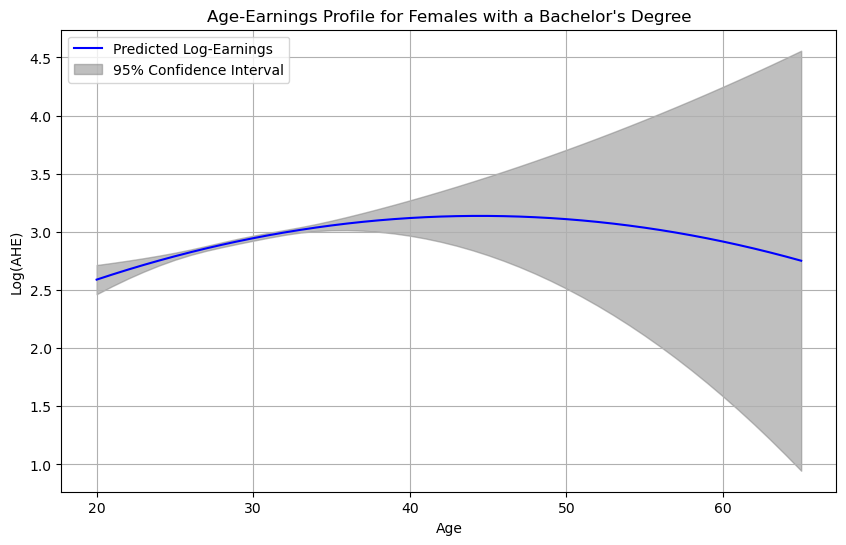

In [6]:
# Prepare data for predictions across the age range 20 to 65
ages = pd.DataFrame({
    'age': range(20, 66),
    'age2': np.square(range(20, 66)),
    'female': 1,
    'bachelor': 1
})

formula2 = 'np.log(ahe) ~ age + age2 + female + bachelor'
model2 = smf.ols(formula2, data=data).fit()

# Generate predictions and confidence intervals
predictions = model2.get_prediction(ages)
predictions_summary = predictions.summary_frame(alpha=0.05)

# Convert age and prediction data to numpy arrays to ensure compatibility
age_array = ages['age'].to_numpy()
mean_array = predictions_summary['mean'].to_numpy()
ci_lower_array = predictions_summary['mean_ci_lower'].to_numpy()
ci_upper_array = predictions_summary['mean_ci_upper'].to_numpy()

# Try plotting using numpy arrays directly
plt.figure(figsize=(10, 6))
plt.plot(age_array, mean_array, label='Predicted Log-Earnings', color='blue')
plt.fill_between(age_array, ci_lower_array, ci_upper_array, color='gray', alpha=0.5, label='95% Confidence Interval')
plt.xlabel('Age')
plt.ylabel('Log(AHE)')
plt.title('Age-Earnings Profile for Females with a Bachelor\'s Degree')
plt.legend()
plt.grid(True)
plt.show()


(e) Causality Discussion:

The coefficient for bachelor's degree in our model is positive and significant, suggesting that having a bachelor's degree is associated with higher log-earnings compared to having just a high school diploma. However, determining if this relationship is causal requires considering whether there might be any omitted variable bias, reverse causality, or any other confounding factors that weren’t controlled for in the model.

In observational data like this, establishing causality is challenging without experimental or quasi-experimental designs (e.g., using instrumental variables, regression discontinuity designs, etc.). Factors such as individual ability, motivation, or other socioeconomic variables could be influencing both the likelihood of obtaining a bachelor’s degree and the earnings potential.

Without controlling for these potential confounders or using a design that can mimic random assignment, we cannot definitively say that the coefficient of bachelor’s degree is a causal effect on earnings. It's a strong association but should be interpreted with caution regarding causality.

### Task (f) Interaction Terms
We will check whether the relationship between age and log-earnings differs by gender. This involves adding interaction terms for `female * age` and `female * age2`, and conducting a hypothesis test to see if these coefficients are significantly different from zero.

1. **Interaction Terms Analysis**: If included in the model, the coefficients for `female_age` and `female_age2` would indicate whether the relationship between age and earnings differs by gender. A significant coefficient for these terms would suggest a differential effect of age on earnings for females compared to males.

2. **Joint Significance Test**: We would typically use an F-test to check if these interaction terms are jointly significant, which would provide stronger evidence about gender differences in the age-earnings relationship.

In [15]:
# Adding interaction terms for female*age and female*age2
data['female_age'] = data['female'] * data['age']
data['female_age2'] = data['female'] * data['age2']

hypotheses = ['female_age = 0', 'female_age2 = 0']
f_test_result = model.f_test(hypotheses)
# Fitting the model with interaction terms
interaction_formula = 'np.log(ahe) ~ age + age2 + female + bachelor + female_age + female_age2'

interaction_model = smf.ols(interaction_formula, data=data).fit()

# Displaying the model summary for interaction terms
interaction_model.summary()


PatsyError: unrecognized token in constraint
    female_age = 0
          ^